In [3]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv("housing_train.csv")
test=pd.read_csv("housing_test.csv")
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
train.shape

(1460, 81)

In [5]:
plt.figure(figsize=(30,20))
sns.heatmap(train.corr(), annot = True, cmap="Greens")

ValueError: could not convert string to float: 'RL'

<Figure size 3000x2000 with 0 Axes>

In [6]:
important_features=[]
for x,y in train.corr()["SalePrice"].to_dict().items():
    if (y > .1 or y < -.1):
        important_features += [x]

important_features

ValueError: could not convert string to float: 'RL'

Get rid of the outliers in the correlation graphs for each feature. 

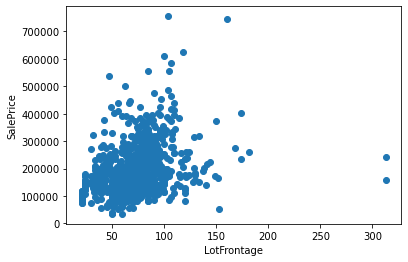

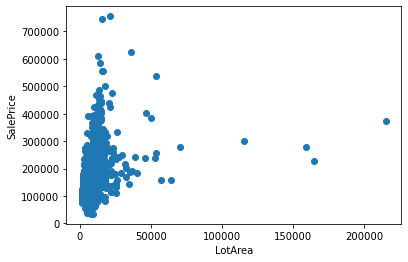

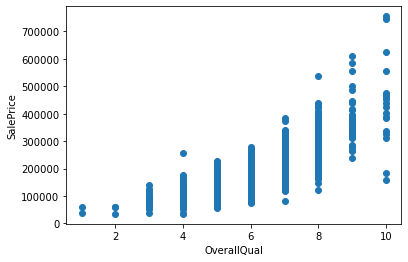

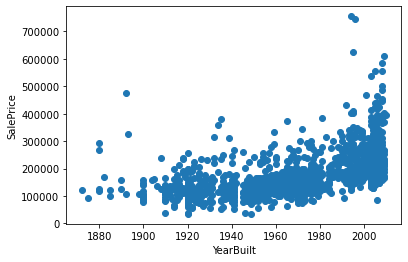

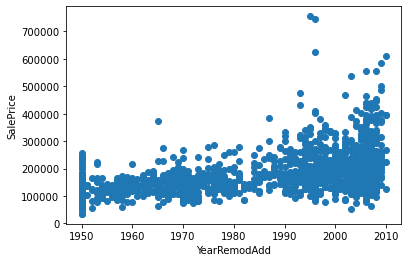

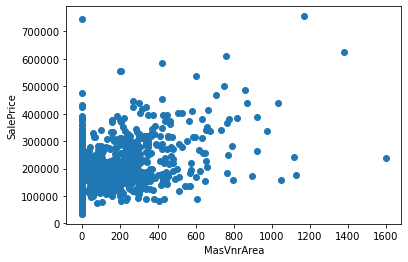

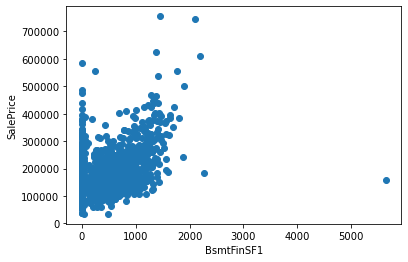

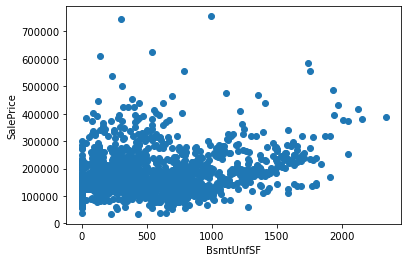

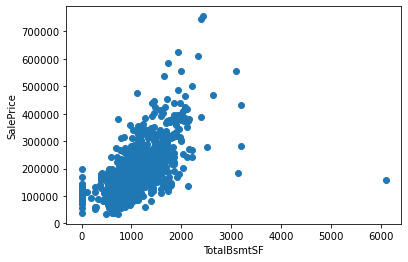

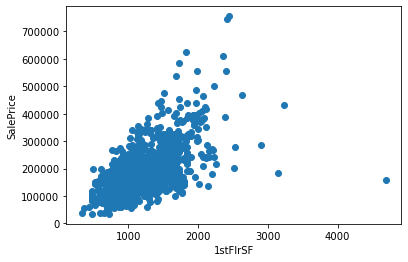

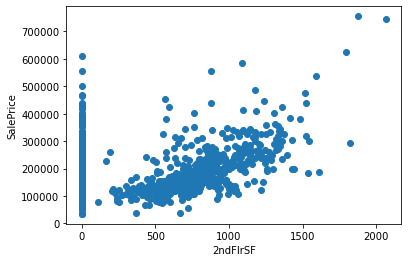

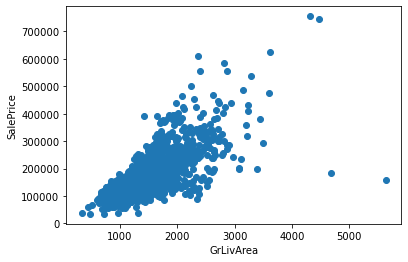

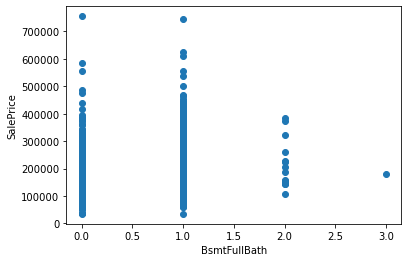

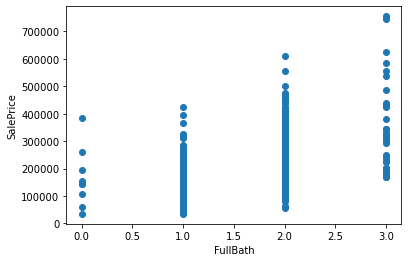

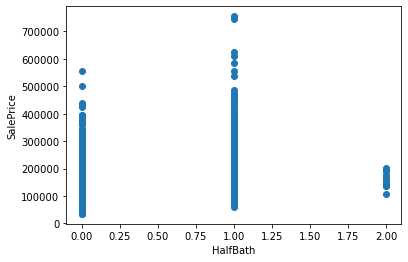

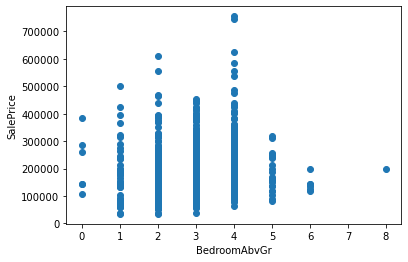

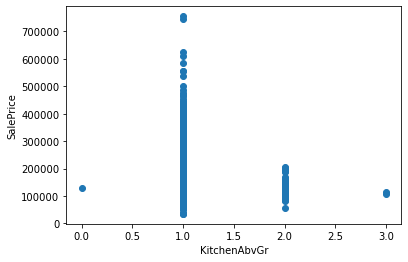

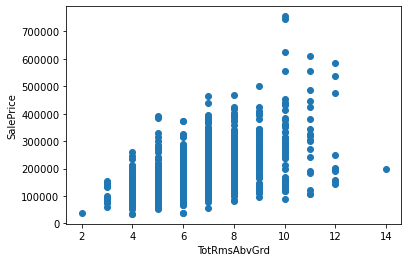

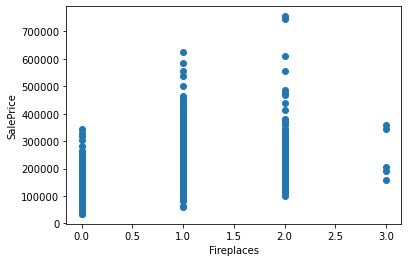

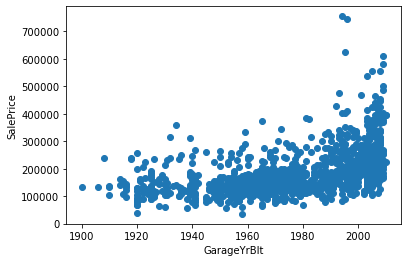

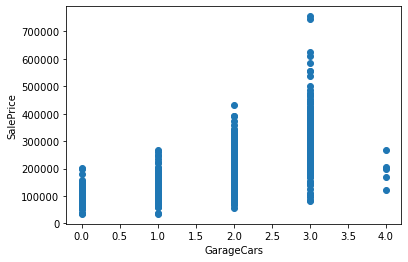

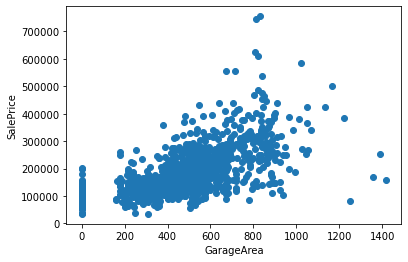

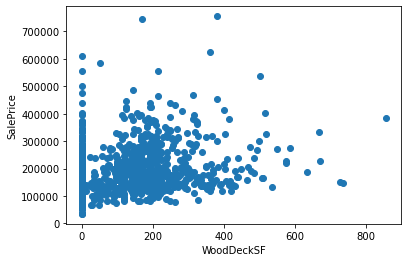

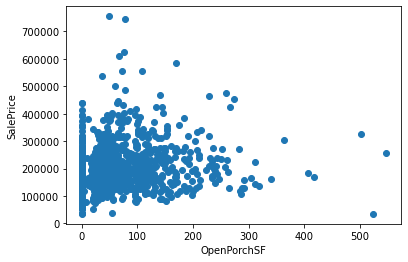

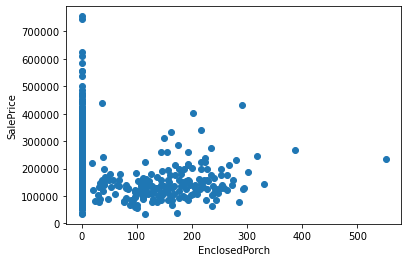

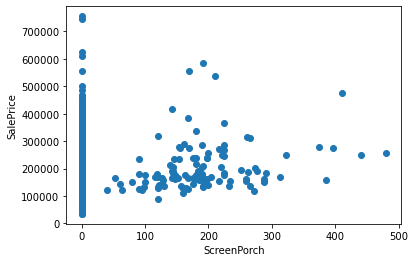

In [12]:
for i in important_features:
    if i == "SalePrice":
        continue
    else:
        plt.scatter(train[i], train["SalePrice"])
        plt.xlabel(i)
        plt.ylabel("SalePrice")
        plt.show()
        

In [13]:
train.drop(train[(train["LotFrontage"] > 250)].index, inplace=True)
train.drop(train[(train["LotArea"] > 100000)].index, inplace=True)
train.drop(train[(train["OverallQual"] < 4.5) & (train["SalePrice"] > 200000)].index, inplace=True)
train.drop(train[(train["YearBuilt"] < 1900) & (train["SalePrice"] > 400000)].index, inplace=True)
train.drop(train[(train["YearBuilt"] > 1980) & (train["SalePrice"] > 700000)].index, inplace=True)
train.drop(train[(train["YearRemodAdd"] > 1990) & (train["YearRemodAdd"] < 2000) & 
            (train["SalePrice"] > 600000)].index, inplace=True)
train.drop(train[(train["MasVnrArea"] == 0) & (train["MasVnrArea"] >= 1400)].index, inplace=True)
train.drop(train[(train["BsmtFinSF1"] > 5000)].index, inplace=True)
train.drop(train[(train["TotalBsmtSF"] > 5000)].index, inplace=True)
train.drop(train[(train["1stFlrSF"] > 4000)].index, inplace=True)
train.drop(train[(train["GrLivArea"] > 4000) & (train["SalePrice"] < 300000)].index, inplace=True)
train.drop(train[(train["FullBath"] == 0) & (train["SalePrice"] > 300000)].index, inplace=True)
train.drop(train[(train["GarageYrBlt"] > 1980) & (train["SalePrice"] > 700000)].index, inplace=True)
train.drop(train[(train["GarageArea"] > 700) & (train["GarageArea"] < 1000) & (train["SalePrice"] > 700000)].index, 
            inplace=True)
train.drop(train[(train["GarageArea"] > 1200) & (train["SalePrice"] < 300000)].index, inplace=True) 
train.drop(train[(train["WoodDeckSF"] > 600) & (train["SalePrice"] < 500000)].index, inplace=True)
train.drop(train[(train["OpenPorchSF"] > 500)].index, inplace=True)
train.drop(train[(train["EnclosedPorch"] > 500)].index, inplace=True)

In [14]:
# combine train and test

train_test = pd.concat([train, test]).reset_index(drop=True)
train_test.shape

(2895, 81)

In [15]:
train_test["SalePrice"]=np.log1p(train_test["SalePrice"])
train_test["SalePrice"]

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
2890          NaN
2891          NaN
2892          NaN
2893          NaN
2894          NaN
Name: SalePrice, Length: 2895, dtype: float64

In [16]:
sale_price=train_test["SalePrice"]
train_test.drop(["SalePrice"], axis=1, inplace=True)

Begin feature engineering.

In [17]:
print("Number of houses without a lot: ", train_test["LotFrontage"].isna().sum())
print("Total number of houses: ", train_test["LotFrontage"].shape[0])

#can split up LotFrontage into "hasLot" with 0 and 1 values

Number of houses without a lot:  481
Total number of houses:  2895


In [18]:
train["HasLot"] = train_test["LotFrontage"].map(lambda s: 0 if np.isnan(s) else 1)
#drop lotfrontage

In [19]:
train_test.shape

(2895, 80)

In [20]:
train_test["TopQual"] = train_test["OverallQual"].map(lambda s: 1 if s >= 30000 else 0)
train_test["HighQual"] = train_test["OverallQual"].map(lambda s: 1 if s < 30000 and s >= 20000  else 0)
train_test["MedQual"] = train_test["OverallQual"].map(lambda s: 1 if s < 20000 and s >=10000 else 0)
train_test["LowQual"] = train_test["OverallQual"].map(lambda s: 1 if s < 10000 else 0)

In [21]:
train_test.shape

(2895, 84)

In [22]:
train_test["year_Pre1950"] = train_test["YearBuilt"].map(lambda s: 1 if s < 1950 else 0)
train_test["year_mid-late1900s"] = train_test["YearBuilt"].map(lambda s: 1 if s >= 1950 and s < 2000 else 0)
train_test["year_21stCentury"] = train_test["YearBuilt"].map(lambda s: 1 if s >= 2000 else 0)

In [23]:
train_test.shape

(2895, 87)

In [24]:
train_test["PoolArea"].value_counts()
#feature for if there is a pool or not

0      2885
561       1
519       1
800       1
738       1
648       1
576       1
444       1
368       1
228       1
144       1
Name: PoolArea, dtype: int64

In [25]:
train_test["HasPool"] = train_test["PoolArea"].map(lambda s: 1 if s > 0 else 0)

In [26]:
train_test.shape

(2895, 88)

In [27]:
train_test["Fence"].isnull().sum()

2331

In [28]:
train_test["Fence"].fillna("None",inplace=True)


In [29]:
count=0
count2=0
for i in train_test["Fence"]:
    if i=="None":
        count+=1
    else:
        count2+=1
print(count)
print(count2)

2331
564


In [30]:
train_test["HasFence"]=train_test["Fence"].map(lambda s: 0 if s=="None" else 1)
train_test["HasFence"].value_counts()

0    2331
1     564
Name: HasFence, dtype: int64

In [31]:
train_test.shape

(2895, 89)

In [32]:
train_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleCondition,TopQual,HighQual,MedQual,LowQual,year_Pre1950,year_mid-late1900s,year_21stCentury,HasPool,HasFence
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,Normal,0,0,0,1,0,0,1,0,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,Normal,0,0,0,1,0,1,0,0,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,Normal,0,0,0,1,0,0,1,0,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,Abnorml,0,0,0,1,1,0,0,0,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,Normal,0,0,0,1,0,0,1,0,0


In [33]:
train_test["BsmtFinType1"].value_counts()

Unf    845
GLQ    840
ALQ    426
Rec    286
BLQ    266
LwQ    153
Name: BsmtFinType1, dtype: int64

In [34]:
#add columns for if basement has finished type 1 and 2 basement

train_test["HasFinishedBsmtType1"]=train_test["BsmtFinType1"].map(lambda s: 0 if s=="Unf" else 1)
train_test["HasFinishedBsmtType2"]=train_test["BsmtFinType2"].map(lambda s: 0 if s=="Unf" else 1)

In [35]:
train_test["BsmtFinSF1"].value_counts().head()

0.0      923
24.0      27
16.0      14
300.0      9
600.0      8
Name: BsmtFinSF1, dtype: int64

In [36]:
train_test["HasBasement"]=train_test["BsmtFinSF1"].map(lambda s:0 if s==0 else 1)

In [37]:
#check 1st and 2nd floor
train_test["1stFlrSF"].value_counts().head()

864     46
1040    28
912     19
960     18
816     18
Name: 1stFlrSF, dtype: int64

In [38]:
train_test["2ndFlrSF"].value_counts().head()

0      1658
546      23
728      18
504      17
672      13
Name: 2ndFlrSF, dtype: int64

In [39]:
train_test["Has2ndFloor"]=train_test["2ndFlrSF"].map(lambda s: 0 if s==0 else 1)

In [40]:
train_test.shape

(2895, 93)

In [41]:
train_test["Fireplaces"].value_counts()

0    1417
1    1257
2     210
3      10
4       1
Name: Fireplaces, dtype: int64

In [42]:
train_test["HasFireplace"]=train_test["Fireplaces"].map(lambda s: 1 if s!=0 else 0)

In [43]:
train_test.shape

(2895, 94)

In [44]:
train_test["GarageType"].value_counts()

Attchd     1708
Detchd      774
BuiltIn     184
Basment      36
2Types       22
CarPort      15
Name: GarageType, dtype: int64

In [45]:
train_test["SeparateGarage"]=train_test["GarageType"].map(lambda s: 1 if s=="Detchd" else 0)

In [46]:
train_test.shape

(2895, 95)

In [47]:
train_test["GarageCars"].value_counts()

2.0    1582
1.0     775
3.0     365
0.0     156
4.0      15
5.0       1
Name: GarageCars, dtype: int64

Text(0, 0.5, 'Number of Houses')

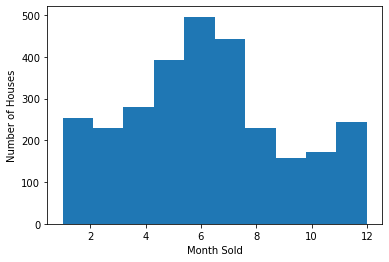

In [48]:
plt.hist(train_test["MoSold"])
plt.xlabel("Month Sold")
plt.ylabel("Number of Houses")

In [49]:
train_test["SeasonSold"]=train_test["MoSold"]

In [50]:
train_test["SeasonSold"][(train_test["SeasonSold"]==12)]=0
train_test["SeasonSold"][(train_test["SeasonSold"]<=2)]=0
train_test["SeasonSold"][(train_test["SeasonSold"]>2)&(train_test["SeasonSold"]<=5)]=1
train_test["SeasonSold"][(train_test["SeasonSold"]>5)&(train_test["SeasonSold"]<=8)]=2
train_test["SeasonSold"][(train_test["SeasonSold"]>8) & (train_test["SeasonSold"]<=11)]=3

In [51]:
train_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,year_21stCentury,HasPool,HasFence,HasFinishedBsmtType1,HasFinishedBsmtType2,HasBasement,Has2ndFloor,HasFireplace,SeparateGarage,SeasonSold
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,1,0,0,1,0,1,1,0,0,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,1,0,1,0,1,0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,1,0,0,1,0,1,1,1,0,3
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,1,0,1,1,1,1,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,1,0,0,1,0,1,1,1,0,0


In [52]:
train_test["SeasonSold"].value_counts()

2    1169
1     900
3     469
0     357
Name: SeasonSold, dtype: int64

In [53]:
train_test["TotalPorchSF"]=train_test["EnclosedPorch"]+train_test["ScreenPorch"]+train_test["OpenPorchSF"]+train_test["3SsnPorch"]

In [54]:
train_test["TotalBathrooms"]=train_test["BsmtFullBath"]+train_test["BsmtHalfBath"]+train_test["FullBath"]+train_test["HalfBath"]
train_test["TotalSF"]=train_test["TotalBsmtSF"]+train_test["1stFlrSF"]+train_test["2ndFlrSF"]


**FILL NAN VALUES**

Fill object nan values with the mode, and numerical nan values with median

In [55]:
train_test_null=pd.DataFrame(train_test.isnull().sum(),columns=["number_of_nan"])
train_test_null_dtypes=pd.DataFrame(train_test.dtypes,columns=["dtypes_of_nan"])

train_test_info=pd.concat([train_test_null,train_test_null_dtypes],axis=1)
pd.set_option('display.max_rows', None)
train_test_info

,number_of_nan,dtypes_of_nan
Id,0,int64
MSSubClass,0,int64
MSZoning,4,object
LotFrontage,481,float64
LotArea,0,int64
Street,0,object
Alley,2698,object
LotShape,0,object
LandContour,0,object
Utilities,2,object


In [56]:
object_vars=[]
numeric_vars=[]
for i in range(len(train_test_info["dtypes_of_nan"])):
    if train_test_info["dtypes_of_nan"][i] == "object" and train_test_info["number_of_nan"][i]!=0:
        object_vars+=[train_test_info.index[i]]
    elif train_test_info["number_of_nan"][i]!=0 and train_test_info["dtypes_of_nan"][i]!="object":
        numeric_vars+=[train_test_info.index[i]]

In [58]:

for i in train_test_info.index:
    mode=train_test[i].mode()
    if i in object_vars:
        train_test[i]=train_test[i].fillna(mode)

In [59]:
numeric_data=pd.DataFrame()
count=0
for i in numeric_vars:
    numeric_data.insert(count,i,train_test[i],True)
    count+=1
skewedness = numeric_data.skew()
skewedness

LotFrontage       0.623942
MasVnrArea        2.537156
BsmtFinSF1        0.980760
BsmtFinSF2        4.152797
BsmtUnfSF         0.918773
TotalBsmtSF       0.673075
BsmtFullBath      0.614326
BsmtHalfBath      3.956547
GarageYrBlt      -0.378335
GarageCars       -0.220966
GarageArea        0.173146
TotalBathrooms    0.494712
TotalSF           0.944570
dtype: float64

In [60]:
skewed=[]
symmetric=[]
#if skew > |.5|, replace with median, else mean

for i in range(len(skewedness)):
    if abs(skewedness[i]) > .5:
        skewed+=[skewedness.index[i]]
    else:
        symmetric+=[skewedness.index[i]]


In [61]:
for i in train_test_info.index:
    if i in skewed:
        train_test[i]=train_test[i].fillna(train_test[i].median())
    elif i in symmetric:
        train_test[i]=train_test[i].fillna(train_test[i].mean())


In [62]:
train_test_null=pd.DataFrame(train_test.isnull().sum(),columns=["number_of_nan"])
train_test_null_dtypes=pd.DataFrame(train_test.dtypes,columns=["dtypes_of_nan"])

train_test_info=pd.concat([train_test_null,train_test_null_dtypes],axis=1)
pd.set_option('display.max_rows', None)
train_test_info

,number_of_nan,dtypes_of_nan
Id,0,int64
MSSubClass,0,int64
MSZoning,0,object
LotFrontage,0,float64
LotArea,0,int64
Street,0,object
Alley,0,object
LotShape,0,object
LandContour,0,object
Utilities,0,object


In [63]:
train_test = pd.get_dummies(train_test)

In [64]:
train_test.shape

(2895, 330)

In [65]:
sale_price = sale_price.dropna()

In [66]:
X = train_test.iloc[:len(sale_price),:]
X_test = train_test.iloc[len(sale_price):,:]
X.shape, sale_price.shape, X_test.shape

((1436, 330), (1436,), (1459, 330))

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

**Random Forest**

In [68]:
rf = RandomForestRegressor(n_estimators=600,
                          max_depth=25,
                          min_samples_split=4,
                          min_samples_leaf=4,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

In [69]:
rf_fit=rf.fit(X,sale_price)
rf_pred=rf.predict(X)
print(rf_pred)

[12.24684953 12.07768222 12.30575061 ... 12.23825042 12.46597881
 11.83891359]


In [70]:
np.sqrt(mean_squared_error(sale_price,rf_pred))

0.07809137660189107

In [71]:
error_rf=np.sqrt(-cross_val_score(rf,X,sale_price,cv=10,scoring="neg_mean_squared_error"))
error_rf.mean()

0.13416167138293705

In [65]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [15,20,10,25],
    'max_features': [None],
    'min_samples_leaf': [4,5,6,7],
    'min_samples_split': [4,5,6,7],
    'n_estimators': [600,800,1000,1200]
}

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 10, n_jobs = -1, verbose = 2)

grid_search.fit(X, sale_price)

Fitting 10 folds for each of 256 candidates, totalling 2560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 36.9min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 60.1min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 85.0min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 113.4min
[Parallel(n_jobs=-1)]: Done 2560 out of 2560 | elapsed: 146.1min finished


GridSearchCV(cv=10,
             estimator=RandomForestRegressor(max_depth=25, max_features=None,
                                             min_samples_leaf=4,
                                             min_samples_split=4,
                                             n_estimators=600, oob_score=True,
                                             random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [15, 20, 10, 25],
                         'max_features': [None],
                         'min_samples_leaf': [4, 5, 6, 7],
                         'min_samples_split': [4, 5, 6, 7],
                         'n_estimators': [600, 800, 1000, 1200]},
             verbose=2)

Grid_search.bestParams

{"Bootstrap":True,   "max_depth":25,   "max_features":None, 
"min_samples_leaf":4,   "min_samples_split":4,   "n_estimators":600}

**SVR**

In [72]:
svr=make_pipeline(RobustScaler(),SVR(C=20,epsilon=.008,gamma=.0003))

In [73]:
error_svr=np.sqrt(-cross_val_score(svr,X,sale_price,cv=12,scoring="neg_mean_squared_error"))

In [74]:
error_svr.mean()

0.16508486266826797

In [75]:
svr_fit=svr.fit(X,sale_price)

In [76]:
svr_pred=svr.predict(X)

In [77]:
np.sqrt(mean_squared_error(sale_price,svr_pred))

0.07628269738175138

**Gradient Boosting Regressor**

In [78]:

gbr = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=9, min_samples_split=8,
                          min_weight_fraction_leaf=0.0, n_estimators=1250,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.9, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
gbr_fit=gbr.fit(X,sale_price)
gbr_pred=gbr.predict(X)
np.sqrt(mean_squared_error(sale_price,gbr_pred))

0.03811991241920763

In [79]:
error_gbr=np.sqrt(-cross_val_score(gbr,X,sale_price,cv=12,scoring="neg_mean_squared_error"))


In [78]:
error_gbr.mean()

0.11649277667526005

**Stacking CV Regressor**

In [80]:
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from mlxtend.regressor import StackingCVRegressor

In [81]:
from mlxtend.regressor import StackingCVRegressor


In [82]:
stack=StackingCVRegressor(regressors=(svr,gbr,rf),meta_regressor=svr,use_features_in_secondary=True)

In [83]:
stack_fit=stack.fit(X,sale_price)
stack_pred=stack.predict(X)
np.sqrt(mean_squared_error(sale_price,stack_pred))

0.0654332732126192

In [84]:
error_stack=np.sqrt(-cross_val_score(stack,X,sale_price,cv=12,
                            scoring="neg_mean_squared_error"))

In [85]:
error_stack.mean()

0.16187704961722818

In [96]:
dict1={"Random_forest":error_rf.mean(),"SVR":error_svr.mean(),
       "Gradient_boosting_regressor":error_gbr.mean(),
       "Stacking_CVRegressor":error_stack.mean()}
       
info=pd.DataFrame(list(dict1.items()),columns=["type","mean_error"])
info

,type,mean_error
0,Random_forest,0.134162
1,SVR,0.165085
2,Gradient_boosting_regressor,0.116297
3,Stacking_CVRegressor,0.161877


**Blending**

In [97]:
np.expm1(.4*stack.predict(X_test) + .3*svr.predict(X_test) + .25*gbr.predict(X_test) + .05*rf.predict(X_test))

array([135930.24603464, 156201.09167581, 191366.78428472, ...,
       169294.38748811, 146903.97950929, 221126.69493919])

**Submit**

In [107]:
prediction=np.expm1(.4*stack.predict(X_test) + .3*svr.predict(X_test) + .25*gbr.predict(X_test) + .05*rf.predict(X_test))

sample_submission=pd.read_csv("sample_submission.csv")
sample_submission.iloc[:,1]=prediction
sample_submission.to_csv("final_output",index=False)
